Plot 3d smaug data - routine for checking the intial configuration

In [1]:
import numpy as np
from numpy import *
import scipy.io
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import struct

%matplotlib inline  

In [11]:
def read_sac_ascii(filename):
    file = open(filename,'rb')

                                                                  
    #read 5 sac file header lines
    
    #1 opozmf_mhd22    #name line 
    header=file.readline()                                                              
    #2      0  0.00000E+00  2  6 10
    head1=file.readline()
    head1=head1.strip()
    head1col=head1.split()
    
    #3 252 252 252    #2D has 2 values
    head2=file.readline()
    head2=head2.strip()
    head2col=head2.split()
    
    #4  1.66667E+00  0.00000E+00  1.00000E+00  0.00000E+00  0.00000E+00  0.00000E+00    #2D
    #4  1.66667E+00  0.00000E+00  1.00000E+00  0.00000E+00  0.00000E+00  0.00000E+00    #3D
    head3=file.readline()
    head3=head3.strip()
    head3col=head3.split()
    
    #5 x y h m1 m2 e b1 b2 eb rhob bg1 bg2   gamma eta   grav1 grav2                   #2D
    #5 x y h m1 m2 m3 e b1 b2 b3 eb rhob bg1 bg2 bg3   gamma eta   grav1 grav2 grav3   #3D
    head4=file.readline()
    head4=head4.strip()
    head4col=head4.split()

    
    #2      0  0.00000E+00  2  6 10
    nits=int(head1col[0])
    time=float(head1col[1])
    ndim=int(head1col[2])
    nvar=int(head1col[3])
    nfields=int(head1col[4])
    
    
    #3 252 252
    
    if ndim==2:
    	dim=[0,0]
    	dim[0]=int(head2col[0])
    	dim[1]=int(head2col[1])
    
    if ndim==3:
        dim=[0,0,0]
        dim[0]=int(head2col[0])
        dim[1]=int(head2col[1])
        dim[2]=int(head2col[2])
    
    modelinfo=(header,nits, time, ndim, nvar, nfields,dim,head3,head4)
    #extract useful information from header lines
    
    if ndim==2:
        alldat=np.zeros((dim[0]*dim[1],ndim+nfields))
    elif ndim==3:
        alldat=np.zeros((dim[0]*dim[1]*dim[2],ndim+nfields))   
    
    #extract components from each line
    count=0
    for line in file:	
        line=line.strip()
        columns=line.split()
        for i in range(ndim+nfields):
            tests=str(columns[i])
            tests=(tests.replace('D','E'))
            tests=(tests.replace('b\'',''))
            alldat[count,i]=(tests.replace('\'',''))
#            alldat[count,i]=float(tests.replace('D','E'))
        count=count+1
    
    #using fortran ordering
    #original sac is fortran and same ordering has been adopted
    if ndim==3:
        alldat=np.reshape(alldat,(dim[0],dim[1],dim[2],nfields+ndim),order='F')
    elif ndim==2:
        alldat=np.reshape(alldat,(dim[0],dim[1],nfields+ndim),order='F')
        
    
    	
    file.close()
    
    return alldat,modelinfo

In [12]:
[alldat,modinfo]=read_sac_ascii('../../configs/3D_128_4Mm_asc.ini')

In [15]:
print(modinfo)

(b'parametricmodel                                                                                     \n', 0, 0.0, 3, 7, 13, [32, 32, 32], b'1.66666700000000      0.00000000000000      1.00000000000000      0.00000000000000      0.00000000000000      0.00000000000000      0.00000000000000      0.00000000000000', b'x y z rho mx my mz e bx by bz gamma eta g1 g2 g3')


In [ ]:
ndata=
datcount=
nw=
ndim=
varnames=
nit=
name=
t=
neqpar=
nw=
varbuf=

In [13]:
print(ndata)
print(type(datcount))
print(nw)
print(ndim)

NameError: name 'ndata' is not defined

In [14]:
print ('varnames:',varnames)
print ('nit:',nit)
print ('name:',name)
print ('t:',t)
print ('ndim:',ndim)
print ('neqpar:',neqpar)
print ('nw:',nw)
print ('varbuf:',varbuf)

NameError: name 'varnames' is not defined

In [26]:
rho=alldat[:,:,:,11]
print(np.shape(alldat))
#+alldat[11,:,:,:]
print(np.min(rho))
print(np.max(rho))

(32, 32, 32, 16)
-793.566
3.10748e-05


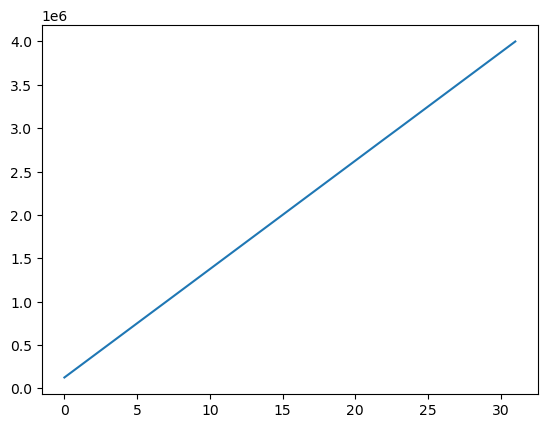

In [52]:
plt.plot(alldat[:,16,16,2])

In [53]:
#vz=alldat[4,:,:,:]/(alldat[3,:,:,:]+alldat[11,:,:,:])
#vars {rho, mom1, mom2, mom3, energy, b1, b2, b3,energyb,rhob,b1b,b2b,b3b}
# 0 x 1 y 2 z 3 rho, 4 mom1, 5 mom2, 6 mom3, 7 energy, 8 b1, 9 b2, 10 b3,11 energyb,12 rhob,13 b1b,14 b2b,15 b3b
vz=alldat[:,:,:,11]
print(np.min(vz))
print(np.max(vz))

-793.566
3.10748e-05


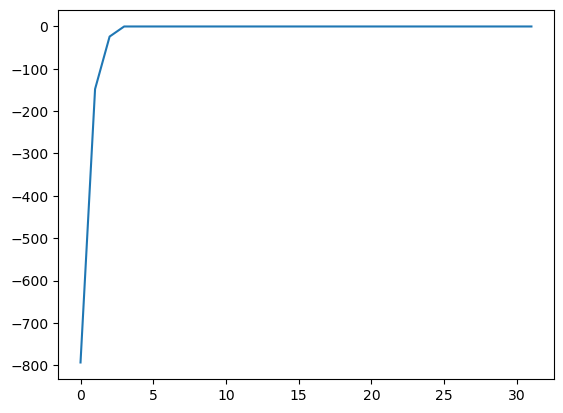

In [55]:
plt.plot(alldat[16,16,:,11])

In [41]:
iz=16
vzx=alldat[iz,:,:,13]
bmin=np.min(vzx)
bmax=np.max(vzx)
print(bmin)
print(bmax)

2.56357e-08
0.000743274


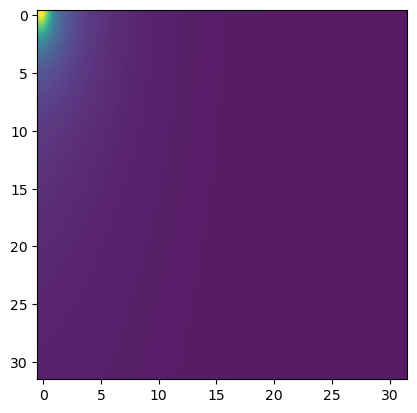

In [42]:
im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=bmin,vmax=bmax)
#im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')

In [90]:
iy=64
vzx=alldat[4,iy,:,:]/(alldat[3,iy,:,:]+alldat[11,iy,:,:])
print(np.min(vzx))
print(np.max(vzx))

-1.0437741216015476e-07
2.6979742405360674e-08


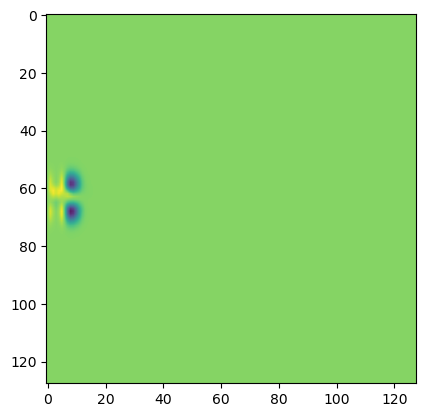

In [91]:
im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=np.min(vzx),vmax=np.max(vzx))
#im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')

In [92]:
iy=64
bzx=(alldat[8,iy,:,:]+alldat[13,iy,:,:])
print(np.min(bzx))
print(np.max(bzx))

7812.5
1992187.5


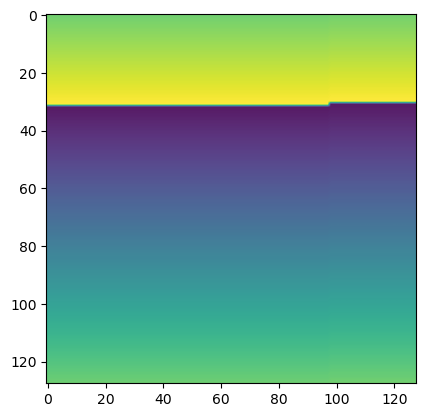

In [93]:
im2 = plt.imshow(bzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=np.min(bzx),vmax=np.max(bzx))

In [94]:
iy=64
bzpx=(alldat[8,iy,:,:])
print(np.min(bzpx))
print(np.max(bzpx))

-0.14314893486617328
0.2551576527575431


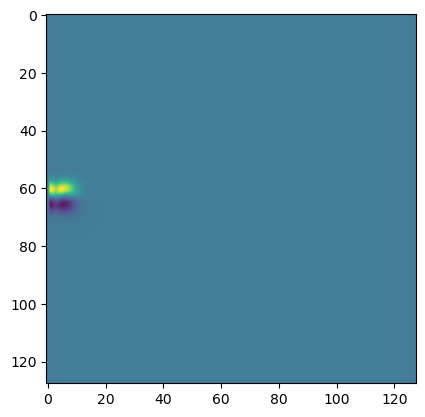

In [95]:
im2 = plt.imshow(bzpx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=np.min(bzpx),vmax=np.max(bzpx))